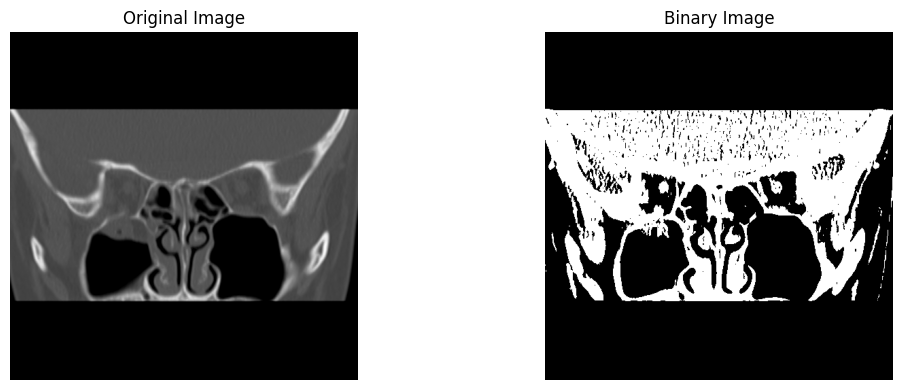

In [68]:
img_path  = '/Users/yuma/Yuma-Kanematsu/nnUNet/src/raw_data/Dataset002_ForTest_segmenetation/imagesTr/6375522_23_R_FLOOR-3_0000.png'

import cv2
import matplotlib.pyplot as plt

# 画像の読み込み
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 二値化を適用
_, binary_img = cv2.threshold(img, 77, 255, cv2.THRESH_BINARY)

# 結果の表示
plt.figure(figsize=(12, 4))

# 元の画像
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2値化画像
plt.subplot(122)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()

値 0 の出現数: 258190 ピクセル (98.49%)
値 1 の出現数: 3954 ピクセル (1.51%)


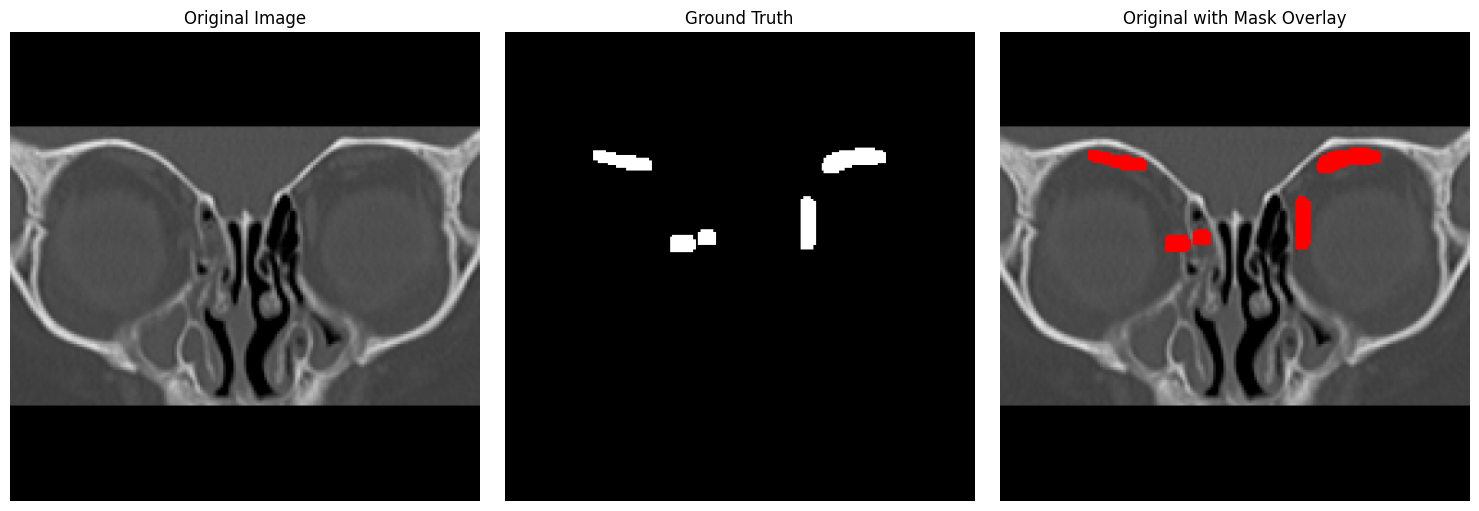

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_image_and_mask(image_path, mask_path):
    """
    画像とマスクを3列（元画像、マスク、重ね合わせ）で表示する関数
    
    Args:
        image_path: 元画像のパス
        mask_path: マスク画像のパス
    """
    # 画像の読み込み
    image = cv2.imread(image_path)
    
    # マスクの読み込み
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    unique_values = np.unique(mask)
    # 値の出現頻度を確認
    for value in unique_values:
        count = np.sum(mask == value)
        percentage = (count / mask.size) * 100
        print(f"値 {value} の出現数: {count} ピクセル ({percentage:.2f}%)")
    
    # マスクが0-1の場合、0-255にスケーリング
    mask = mask * 255
    
    overlay_img = image.copy()
    overlay_img[mask > 0, 0] = 255  # Red channel
    overlay_img[mask > 0, 1] = 0    # Green channel
    overlay_img[mask > 0, 2] = 0    # Blue channel
    
    # 表示用の設定
    plt.figure(figsize=(15, 5))
    
    # 元画像の表示
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    # マスク画像の表示
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    # 重ね合わせ画像の表示
    plt.subplot(1, 3, 3)
    plt.imshow(image)
    plt.title('Original with Mask Overlay')
    plt.imshow(overlay_img)  # Overlay with transparency
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Dataset005_Orbital_ROI
# Dataset004_Orbital_same_testdata

# 使用例：
image_path = "/Users/yuma/Yuma-Kanematsu/nnUNet/src/raw_data/Dataset005_Orbital_ROI/imagesTr/7795253_43_R_FLOOR-3_0000.png"
mask_path = "/Users/yuma/Yuma-Kanematsu/nnUNet/src/raw_data/Dataset005_Orbital_ROI/labelsTr/6951166_20_R_MED-3.png"
visualize_image_and_mask(image_path, mask_path)